In [1]:
import matplotlib
import numpy as np
import pandas as pd
import scipy as sp
import csv
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec
import pickle
from scipy.ndimage.filters import gaussian_filter1d as smooth
import string
import statsmodels.api as sm
from scipy.stats import linregress
from matplotlib.colors import Normalize
from matplotlib import collections
import math
from IPython import display
import time as time_module

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.fancybox'] = False

font = {'weight' : 'normal',
      'size'   : 12}

plt.rc('font', **font)

import seaborn as sns



from fiveFAIR import oxfair

In [2]:
RCP85_E = pd.read_csv('./RCP_data/RCP85_EMISSIONS.csv',skiprows=36,index_col=0)
RCP85_C = pd.read_csv('./RCP_data/RCP85_MIDYEAR_CONCENTRATIONS.csv',skiprows=37,index_col=0)
RCP6_E = pd.read_csv('./RCP_data/RCP6_EMISSIONS.csv',skiprows=36,index_col=0)
RCP6_C = pd.read_csv('./RCP_data/RCP6_MIDYEAR_CONCENTRATIONS.csv',skiprows=37,index_col=0)
RCP45_E = pd.read_csv('./RCP_data/RCP45_EMISSIONS.csv',skiprows=36,index_col=0)
RCP45_C = pd.read_csv('./RCP_data/RCP45_MIDYEAR_CONCENTRATIONS.csv',skiprows=37,index_col=0)
RCP3_E = pd.read_csv('./RCP_data/RCP3PD_EMISSIONS.csv',skiprows=36,index_col=0)
RCP3_C = pd.read_csv('./RCP_data/RCP3PD_MIDYEAR_CONCENTRATIONS.csv',skiprows=37,index_col=0)

RCP = {'85':{},'6':{},'45':{},'3':{}}

RCP['85']['E'] = RCP85_E
RCP['85']['C'] = RCP85_C
RCP['6']['E'] = RCP6_E
RCP['6']['C'] = RCP6_C
RCP['45']['E'] = RCP45_E
RCP['45']['C'] = RCP45_C
RCP['3']['E'] = RCP3_E
RCP['3']['C'] = RCP3_C

In [3]:
def concplot(C,rcp='45'):

    fig,ax=plt.subplots(2,3,figsize=(15,7))
    
    rcps = ['85','6','45','3']
    colors = ['r','brown','g','b']
    
    for i,rcp in enumerate(rcps):

        #ax[0,0].plot(emissions[0])
        ax[0,0].plot(RCP[rcp]['E'].FossilCO2+RCP[rcp]['E'].OtherCO2,color=colors[i],label=rcp+' emissions')
        ax[0,0].set_ylabel('GtC')
        ax[0,0].set_title('CO$_2$')

        ax[1,0].plot(RCP[rcp]['C'].CO2,color=colors[i],label=rcp+' data')
        ax[1,0].plot(RCP[rcp]['C'].CO2.index.values,C[rcp][0],'--',color=colors[i],label=rcp+'-5FAIR')
        ax[1,0].legend(loc='best')
        ax[1,0].set_ylabel('ppm')

        ax[0,1].plot(RCP[rcp]['E'].CH4,color=colors[i])
        ax[0,1].set_ylabel('GtCH$_4$')
        ax[0,1].set_title('CH$_4$')

        ax[1,1].plot(RCP[rcp]['C'].CH4,color=colors[i],label='RCP')
        ax[1,1].plot(RCP[rcp]['C'].CH4.index.values,C[rcp][1],'--',color=colors[i],label='5FAIR')
        ax[1,1].set_ylabel('ppb')

        ax[0,2].plot(RCP[rcp]['E'].N2O,color=colors[i])
        ax[0,2].set_ylabel('GtN$_2$O-N$_2$')
        ax[0,2].set_title('N$_2$O')

        ax[1,2].plot(RCP[rcp]['C'].N2O,color=colors[i],label='RCP')
        ax[1,2].plot(RCP[rcp]['C'].N2O.index.values,C[rcp][2],'--',color=colors[i],label='5FAIR')
        ax[1,2].set_ylabel('ppb')

    plt.tight_layout()

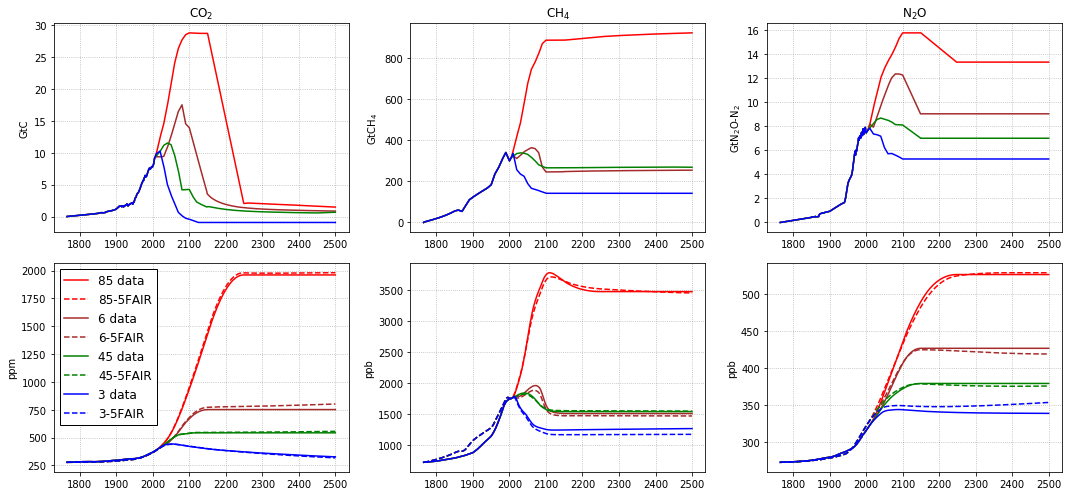

In [4]:
## Fitting by hand: 

## NB. The r parameters all feedback depending on the following variables:
# r[0] affects the lifetime directly
# r[1] affects the lifetime based on quantity of gas lost from the atmosphere
# r[2] affects the lifetime based on temperature
# r[3] affects the lifetime based on gas concentration

rcps = ['85','6','45','3']

C = {}

emissions = np.zeros((3,736))

for rcp_test in rcps:
    emissions[0,:] = RCP[rcp_test]['E'].FossilCO2.values + RCP[rcp_test]['E'].OtherCO2.values
    emissions[1,:] = RCP[rcp_test]['E'].CH4.values
    emissions[2,:] = RCP[rcp_test]['E'].N2O.values

    C[rcp_test] = oxfair(emissions = emissions,r = np.array([[32.40,0.019,4.165,0.0],[ 9.05942806e+00, -1.03745809e-07, -1.85711888e-01,  1.45117387e-04],[ 4.97443512e+01,  5.87120814e-04, -2.02130466e+00,  2.07719812e-02]]))[0]

concplot(C,rcp=rcp_test)